In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

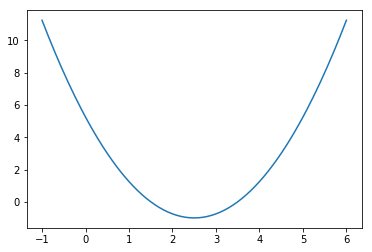

In [3]:
plot_y = (plot_x - 2.5) ** 2 - 1
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
def dJ(theta): #对损失函数J求导, theta点上的导数（斜率）
    return 2 * (theta - 2.5)

In [42]:
def J(theta):
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf')
    #try: 先试一下这个， 如果不行，再返回except

In [15]:
eta = 0.1
theta = 0.0
epsilon = 1e-8 #退出循环的阈值
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta + (-1) * eta * gradient #eta是学习率， -1是我们需要求损失函数减小的方向
    # gradient == 0的时候我们终止，但是浮点数不能用 == 判断，因为有误差。另外可能eta选的不好，不能到达极值
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
print(theta) #函数 Y = (X - 2.5)^2 - 1的极值的确在x = 2.5处
print(J(theta))

2.499891109642585
-0.99999998814289


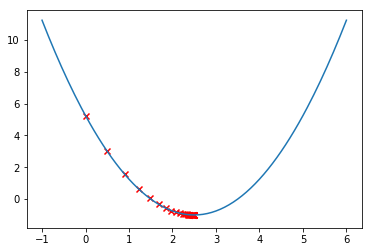

In [20]:
theta = 0.0
theta_series = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta + (-1) * eta * gradient
    theta_series.append(theta)
    if(abs( J(theta) - J(last_theta) ) < epsilon ):
        break
# print(theta_series)
plt.plot(plot_x, plot_y)
plt.scatter(np.array(theta_series), J(np.array(theta_series)), color = 'r', marker = 'x')
plt.show()

In [21]:
len(theta_series)

46

In [51]:
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    theta_series = [theta]
    i_iter = 0
    while i_iter <= n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta + (-1) * eta * gradient
        theta_series.append(theta)
        if(abs( J(theta) - J(last_theta) ) < epsilon ):
            break
        i_iter += 1
        
    return theta_series

def plot_theta_series(theta_series):
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_series), J(np.array(theta_series)), color = 'r', marker = 'x')
    plt.show()

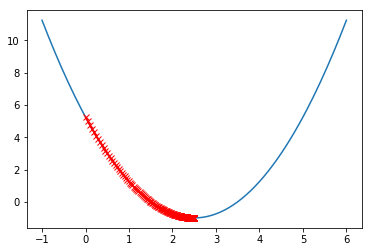

In [52]:
eta = 0.01
theta_series = []
theta_series = gradient_descent(0.0, eta)
plot_theta_series(theta_series) #学习率变低，需要学习的次数增多

In [53]:
len(theta_series)

424

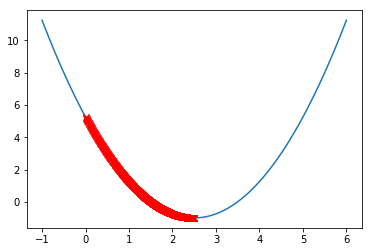

In [54]:
eta = 0.001
theta_series = []
theta_series = gradient_descent(0.0, eta)
plot_theta_series(theta_series) #学习率变低，需要学习的次数增多

In [55]:
len(theta_series)

3682

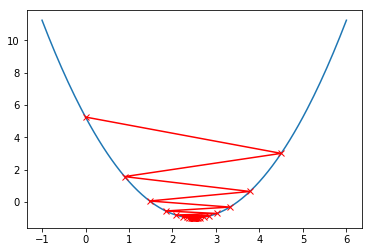

In [56]:
eta = 0.9
theta_series = []
theta_series = gradient_descent(0.0, eta)
plot_theta_series(theta_series) #学习率变很大，我们虽然最后还是收敛，但是也是很慢

In [60]:
eta = 1.1
theta_series = []
theta_series = gradient_descent(0.0, eta)
#学习率变很大，我们最后发散了. 防止我们J(theta)变得很大报错，我们一个用了try except, 另外一个用了i_iter < n_iters 
len(theta_series)

10002

In [61]:
theta_series[-1] #theta取值很大的时候python记为na

nan

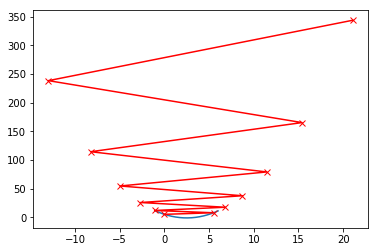

In [62]:
eta = 1.1
theta_series = []
theta_series = gradient_descent(0.0, eta, n_iters=10)
plot_theta_series(theta_series)
#学习率变很大，我们最后发散了. 防止我们J(theta)变得很大报错，我们一个用了try except, 另外一个用了i_iter < n_iters 

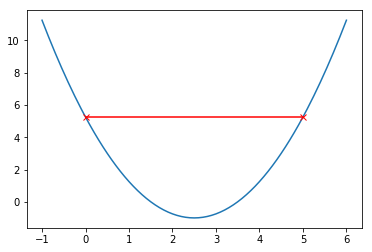

In [63]:
eta = 1.0
theta_series = []
theta_series = gradient_descent(0.0, eta, n_iters=10)
plot_theta_series(theta_series)
#学习率变很大，我们最后发散了. 防止我们J(theta)变得很大报错，我们一个用了try except, 另外一个用了i_iter < n_iters 

### 注意在这个例子中，eta < 1 可以收敛， eta > 1 发散。但是这不代表对于所有的损失函数eta都需要小于1.
### eta的合理范围需要由我们的J函数的具体样子决定，所以我们需要grid search不同的eta
### 一般来说eta = 0.01都是足以胜任最小化J函数的